<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/ex09_yolov6_chinchilla_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# gpu 설정
# 드라이브 연동
# deep / YOLO_STUDY 폴더까지 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY

/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY


### 목표
  - yolov6 모델을 친칠라 데이터로 학습하여 친칠라 탐지를 할 수 있는지 활용해보자

In [ ]:
# yolov6 설치해주기!
# !git clone https://github.com/meituan/YOLOv6
# %cd YOLOv6
# !pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3785, done.
remote: Counting objects: 100% (1665/1665), done.
remote: Compressing objects: 100% (291/291), done.
remote: Total 3785 (delta 1472), reused 1375 (delta 1374), pack-reused 2120
Receiving objects: 100% (3785/3785), 47.11 MiB | 14.72 MiB/s, done.
Resolving deltas: 100% (2304/2304), done.
Updating files: 100% (232/232), done.
/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY/YOLOv6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll

In [ ]:
# 넘파이 버전 다운그레이드
# !pip install numpy==1.24

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.0 which is incompatible.
seaborn 0.12.2 requires numpy!=1.24.0,>=1.17, but you have numpy 1.24.0 which is incompatible.


In [ ]:
%cd ./YOLOv6

/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY/YOLOv6


In [ ]:
# 데이터 다운로드
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KaZ7N1vLp6BqcHmii8Rp")
project = rf.workspace("jangjw").project("chinchilla_detection-aif9j")
dataset = project.version(1).download("mt-yolov6")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chinchilla_detection-1 in mt-yolov6:: 100%|██████████| 250/250 [01:57<00:00,  2.13it/s]


In [ ]:
!pip install addict

In [ ]:
# 모델 훈련시키기
# train.py 모델이 학습할 수 있게 설정하는 값을 연결하는 코드 집합
# 실제로 학습하는 모델은 conf 연결 : yolov6.py , yolov6s_finetune.py , yolov6m.py ...
!python tools/train.py --batch 32 --conf configs/yolov6s_finetune.py --epochs 100 --img-size 640 --data chinchilla_detection-1/data.yaml --device 0

2023-10-13 17:12:37.014769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 17:12:37.969220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using 1 GPU for training... 
training args are: Namespace(data_path='chinchilla_detection-1/data.yaml', conf_file='configs/yolov6s_finetune.py', img_size=640, rect=False, batch_size=32, epochs=100, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, ca

In [21]:
ls

assets/                  data/    hubconf.py       README_cn.md      runs/           weights/
chinchilla_detection-1/  deploy/  inference.ipynb  README.md         tools/          yolov6/
configs/                 docs/    LICENSE          requirements.txt  tutorial.ipynb


In [24]:
# best_model='/content/drive/MyDrive/Colab Notebooks/DeepLearning/YOLO_STUDY/YOLOv6/runs/train/exp/weights/best_ckpt.pt'
# 학습하고 난 후의 best_ckpt.pt 모델을 활용해서 예측해보자
# predict => infer.py
!python tools/infer.py --save-txt --yaml chinchilla_detection-1/data.yaml --weights runs/train/exp/weights/best_ckpt.pt --source chinchilla_detection-1/images/test/ --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='chinchilla_detection-1/images/test/', webcam=False, webcam_addr='0', yaml='chinchilla_detection-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=True, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 5/5 [00:01<00:00,  4.75it/s]
Results saved to runs/inference/exp


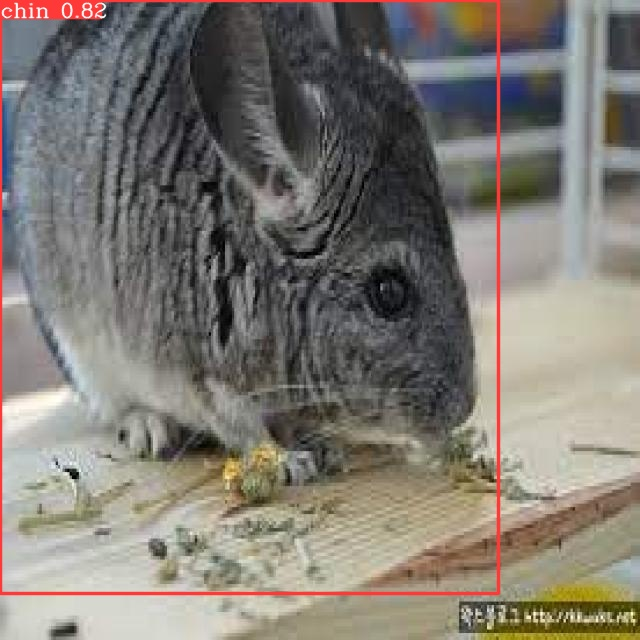

WnWn


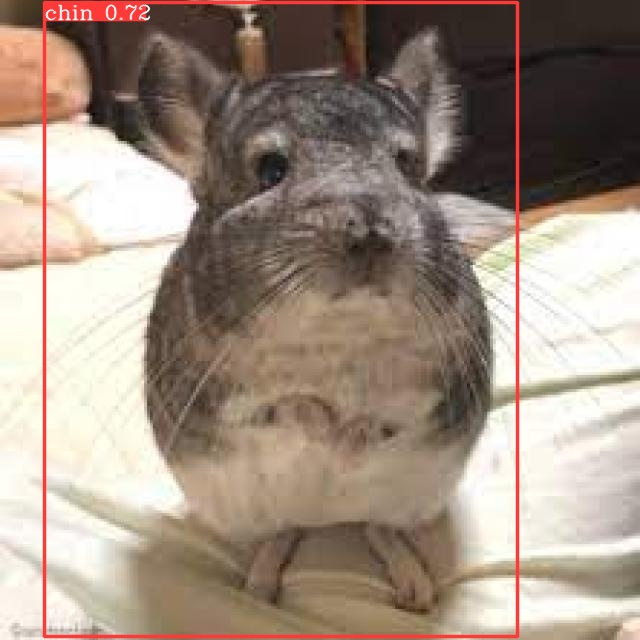

WnWn


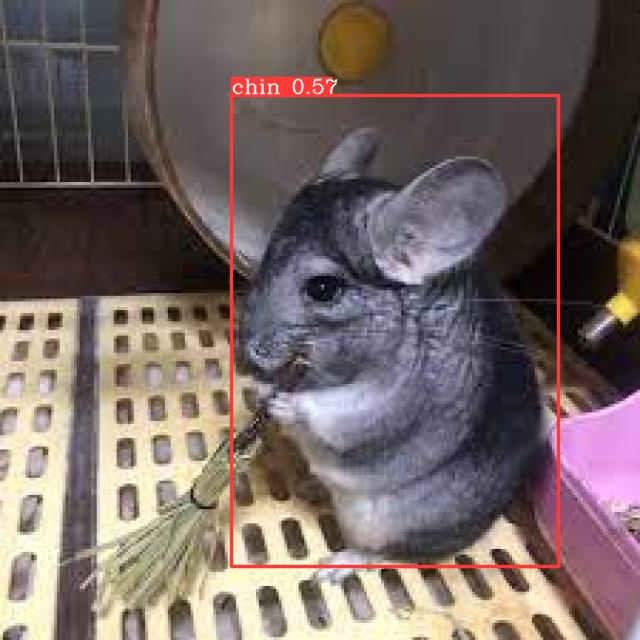

WnWn


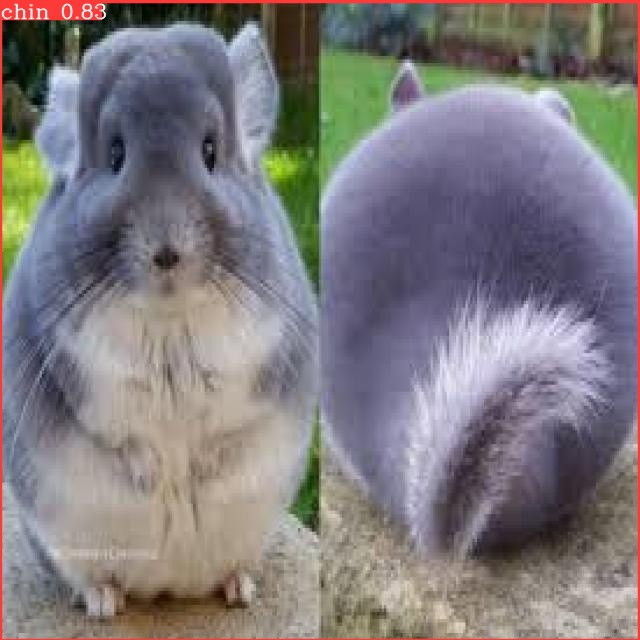

WnWn


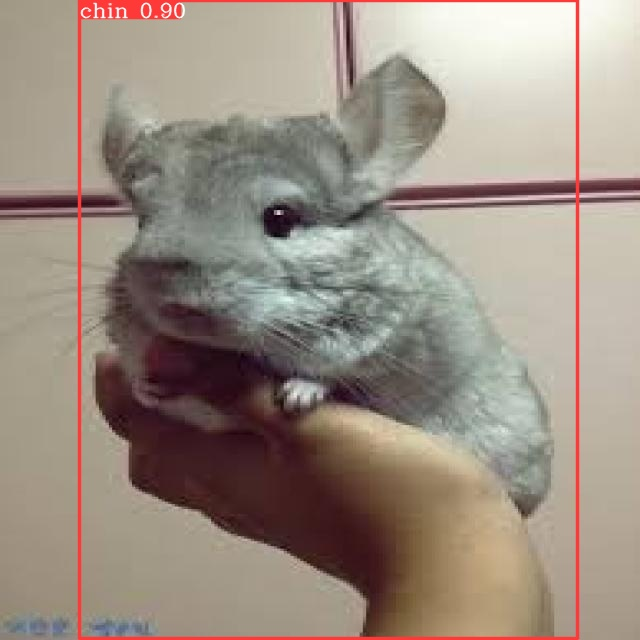

WnWn


In [27]:
# 객체 탐지하고 난 이후 이미지 파일 불러오기
import glob
from IPython.display import Image, display

for image_fn in glob.glob('./runs/inference/exp/*.jpg'):
  display(Image(filename=image_fn))
  print('WnWn')